In [30]:
##Data Cleaning Section

#Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#Import assignment dataset as pandas dataframe, named studentdf
studentdf = pd.read_csv("StudentData2.csv")

#Create new column with length of id column, filter where id length is 6, and create new student df
#Drop IDNEW column after filtering
studentdf['IDNEW'] = studentdf['id'].map(str).apply(len)
studentdf = studentdf[studentdf.IDNEW == 6]
studentdf = studentdf.drop(columns = ['IDNEW'])

#Filter where gender column does not equal 1 or 2 and append
studentdf1 = studentdf[studentdf['gender'] == 1]
studentdf2 = studentdf[studentdf['gender'] == 2]
studentdf = studentdf1.append(studentdf2)

#Filter age, gpa, sat, final columns, and drop NaN rows
studentdf = studentdf[(studentdf['age'] >= 18) & (studentdf['age'] <= 80)]
studentdf = studentdf[(studentdf['gpa'] >= 0) & (studentdf['gpa'] <= 4.0)]
studentdf = studentdf[(studentdf['sat'] >= 0) & (studentdf['sat'] <= 1600)]
studentdf = studentdf[(studentdf['final'] >= 0) & (studentdf['final'] <= 100)]
studentdf = studentdf.dropna()

#Print and write cleaned dataset to OUTFILE.txt
print(studentdf)
np.savetxt('OUTFILE.txt', studentdf.values, fmt='%d', delimiter="\t", header="id\gender\age\gpa\sat\section\final\project")  

        id  gender  age   gpa     sat  section  final  project
17  667689       1   26  3.36  1111.0      3.0     60       67
18  658905       1   25  3.47  1152.0      4.0     71       79
20  670432       1   23  3.34  1130.0      1.0     82       87
22  660608       1   27  3.10  1104.0      3.0     56       60
23  653457       1   28  3.38  1355.0      3.0     69       76
24  675282       1   29  3.09  1090.0      5.0     78       89
25  638785       1   23  3.59  1250.0      1.0     97       99
27  641697       1   28  3.02  1070.0      5.0     46       52
28  686836       1   28  3.45  1306.0      5.0     86       79
29  654301       1   30  3.49     3.0      2.0     92       92
30  615986       1   30  3.54  1350.0      5.0     91       87
0   618027       2   27  2.59   700.0      3.0     75       69
1   691694       2   33  3.49   950.0      4.0     89       81
2   661363       2   31  3.78  1172.0      5.0     75       86
4   624861       2   27  3.47  1099.0      3.0     89  

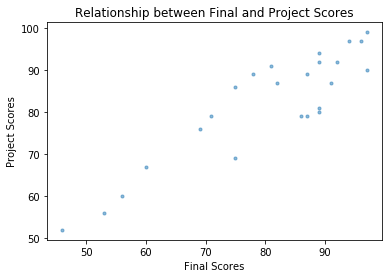

,id,gender,age,gpa,sat,section,final,project
17,667689,1,26,3.36,1111.0,3.0,60,67
18,658905,1,25,3.47,1152.0,4.0,71,79
20,670432,1,23,3.34,1130.0,1.0,82,87
22,660608,1,27,3.10,1104.0,3.0,56,60
23,653457,1,28,3.38,1355.0,3.0,69,76
24,675282,1,29,3.09,1090.0,5.0,78,89
25,638785,1,23,3.59,1250.0,1.0,97,99
27,641697,1,28,3.02,1070.0,5.0,46,52
28,686836,1,28,3.45,1306.0,5.0,86,79
29,654301,1,30,3.49,3.0,2.0,92,92


In [35]:
##Skipping Question 5, moving to Question 6

#Isolate final and project scores
final = studentdf['final']
project = studentdf['project']
area = np.pi*3
plt.scatter(final, project, s=area, alpha=0.5)
plt.title('Relationship between Final and Project Scores')
plt.xlabel('Final Scores')
plt.ylabel('Project Scores')
plt.show()



In [39]:
#Create bins list with GPA ranges, and create grades list of letter grades
bins = [0, 1, 1.7, 2.7, 3.7, 4]
grades = ['F', 'D', 'C', 'B', 'A']

#Create new letter_grade column that cuts gpa column of studentdf by the ranges in bins, assigns labels from grades list
studentdf['letter_grade'] = pd.cut(studentdf['gpa'], bins, labels=grades)

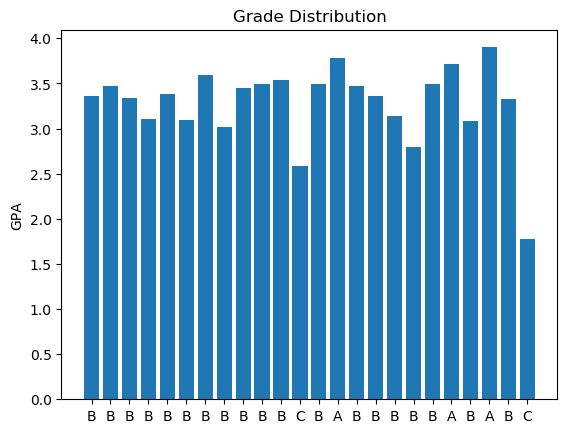

In [74]:
#Create bar graph showing GPA values
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

gradesdf = studentdf['letter_grade']
gpadf = studentdf['gpa']

x_pos = np.arange(len(gradesdf))


objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
#y_pos = np.arange(len(gradesdf))
performance = [10,8,6,4,2,1]

plt.bar(x_pos, gpadf)
plt.xticks(x_pos, gradesdf)
plt.ylabel('GPA')
plt.title('Grade Distribution')

plt.show()

#https://python-graph-gallery.com/11-grouped-barplot/
